In [3]:
import pickle
import sys, os
sys.path.insert(1, os.path.join(sys.path[0], ".."))
from modt.modt import MoDT
from modt._initialization import *
from modt.visualization import *
from modt.utility import *

import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams['font.size'] = 12

COLOR = 'black'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['xtick.color'] = COLOR

In [4]:
#data_input = pickle.load(open("../datasets/generated6_input.np", "rb"))
#data_target = pickle.load(open("../datasets/generated6_target.np", "rb"))
#data_input = pickle.load(open("../datasets/iris_input.pd", "rb"))
#data_target = pickle.load(open("../datasets/iris_target.pd", "rb"))
data_input = pickle.load(open("../datasets/steel_input.pd", "rb"))
data_target = pickle.load(open("../datasets/steel_target.pd", "rb"))
#data_input = pickle.load(open("../datasets/bank_input.pd", "rb"))  # Pd & Categoric features
#data_target = pickle.load(open("../datasets/bank_target.pd", "rb"))
#data_input = pickle.load(open("../datasets/banknote_input.pd", "rb"))  # Pd & numeric features
#data_target = pickle.load(open("../datasets/banknote_target.pd", "rb"))
parameters = {
    "X": data_input,
    "y": data_target,
    "n_experts": 4,
    "iterations": 300,
    "max_depth": 2,
    "init_learning_rate": 30,
    "learning_rate_decay": 1,
    "initialization_method": "random",
    "feature_names": None,
    "class_names": None,
    "use_2_dim_gate_based_on": "feature_importance_lda",
    "use_2_dim_clustering": False,
    "black_box_algorithm": None,
    "save_likelihood": True,
    }

parameters_fit = {
    "optimization_method": "ridge_regression",
    "early_stopping": False,
    "use_posterior": False,
    }

modt = MoDT(**parameters)
modt.fit(**parameters_fit)

Accuracy disjoint DTs: 0.6476043276661515
Min:  0.5363214837712519 Max:  0.6506955177743431


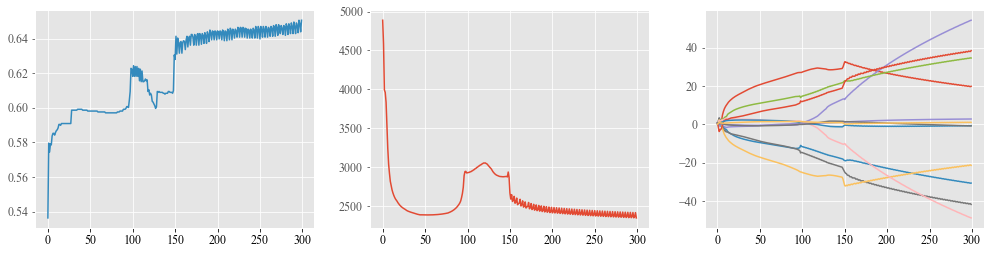

In [5]:
print("Accuracy disjoint DTs:", modt.score_internal_disjoint())
fig = plt.gcf()
fig.set_size_inches(17,4)
plt.subplot(1, 3, 1)
accuracy_line(modt)
plt.subplot(1, 3, 2)
plt.plot(modt.all_likelihood)
plt.subplot(1, 3, 3)
theta_development(modt)

In [6]:
modt.train_disjoint_trees(modt.best_iteration, tree_algorithm="sklearn_asymmetric")

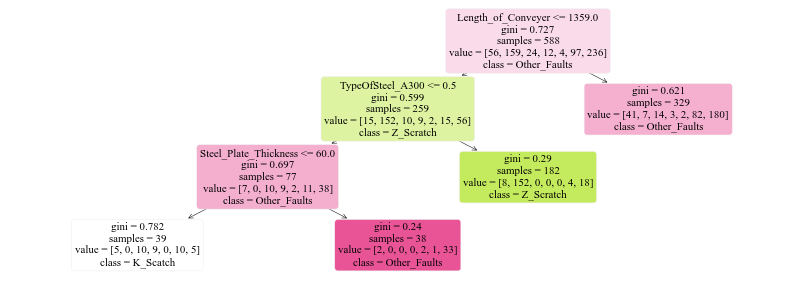

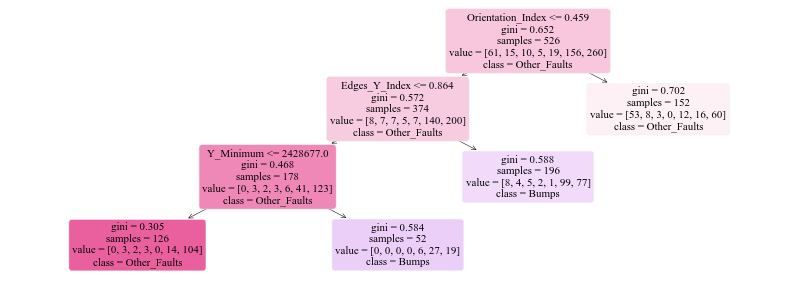

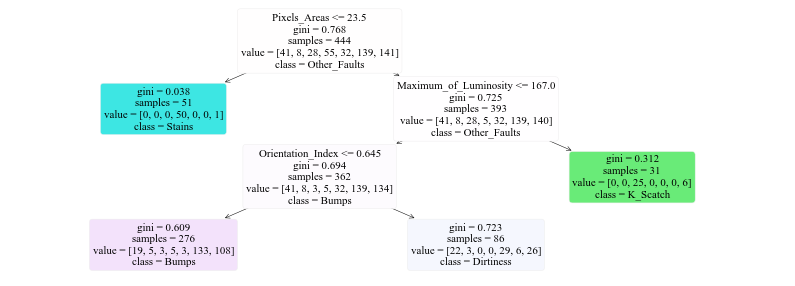

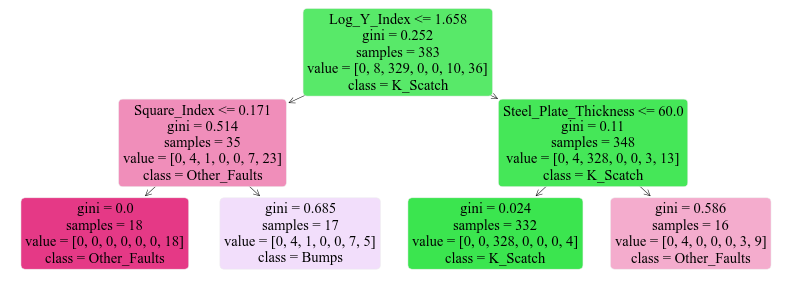

In [7]:
for expert in range(0,modt.n_experts):
    plot_disjoint_dt(modt, expert=expert, asymmetric=True, size=(14,5))

In [ ]:
modt.train_disjoint_trees(modt.best_iteration, tree_algorithm="optimal_trees")

In [ ]:
modt.DT_experts_alternative_algorithm[0].get_learner()

In [ ]:
modt.DT_experts_alternative_algorithm[1].get_learner()

In [ ]:
modt.train_disjoint_trees(modt.best_iteration, tree_algorithm="h2o")

H2o plots are saved into ./output folder.